In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('Train.csv')  # Adjust filename if needed
df.head()
# Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [2]:
import pandas as pd
import numpy as np

# List of common non-standard missing value indicators
na_values = ['Na', 'NA', 'na', 'n/a', 'N/A', '?', '', 'null', 'NULL']

# Reload dataset treating all above as missing values
df = pd.read_csv('Train.csv', na_values=na_values)


In [3]:
# Total missing values
print("Missing values per column:\n", df.isnull().sum())

# Check % of missing values (optional)
print("\nPercentage of missing values:\n", df.isnull().mean() * 100)

Missing values per column:
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Percentage of missing values:
 ID                     0.0
Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached.on.Time_Y.N    0.0
dtype: float64


In [4]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
num_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
            'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# Apply StandardScaler (Z-score)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])



In [5]:
# One-Hot Encode categorical features
df = pd.get_dummies(df, columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], drop_first=True)


In [6]:
# Example feature: high_discount_flag
df['High_Discount'] = df['Discount_offered'] > 0.5  # Already scaled, so >0.5 implies originally high discount

# Convert boolean to integer
df['High_Discount'] = df['High_Discount'].astype(int)


In [7]:
from sklearn.model_selection import train_test_split

# Define target and features
X = df.drop(columns=['ID', 'Reached.on.Time_Y.N'])  # Drop ID and target
y = df['Reached.on.Time_Y.N']

# Split into train and test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
df.to_csv('Preprocessed_Delivery.csv', index=False)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [10]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Dictionary to hold results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
    }


In [11]:
# Create DataFrame from results
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:\n")
print(results_df)


Model Performance Comparison:

                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression  0.645909   0.719934  0.665651  0.691729  0.723129
Decision Tree        0.638636   0.694153  0.705255  0.699660  0.622639
Random Forest        0.671364   0.777256  0.629855  0.695835  0.738086
SVM                  0.665909   0.855911  0.529322  0.654118  0.737384


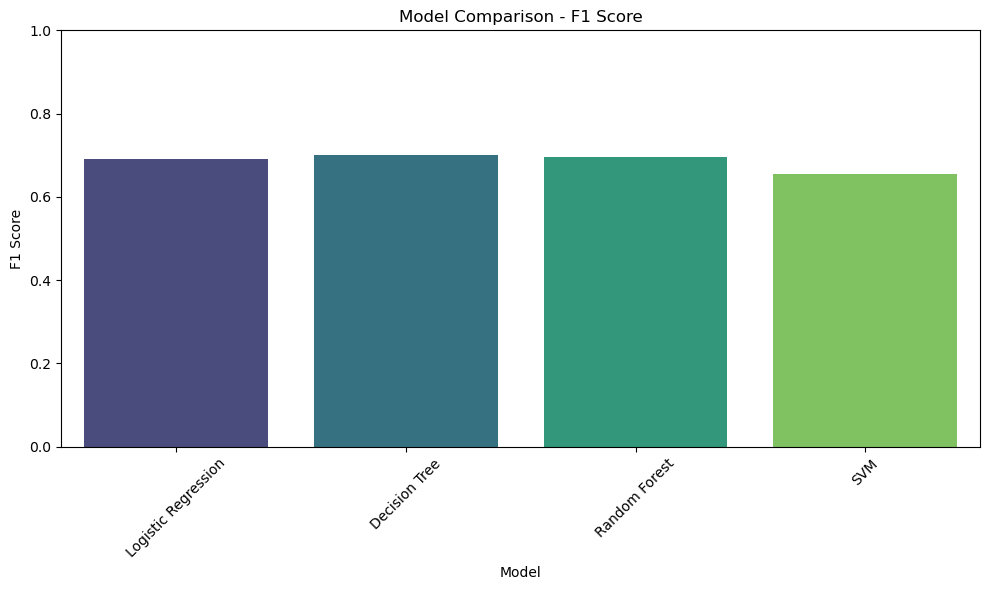

In [13]:
# Plotting F1 Score Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['F1 Score'], palette='viridis')
plt.title('Model Comparison - F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


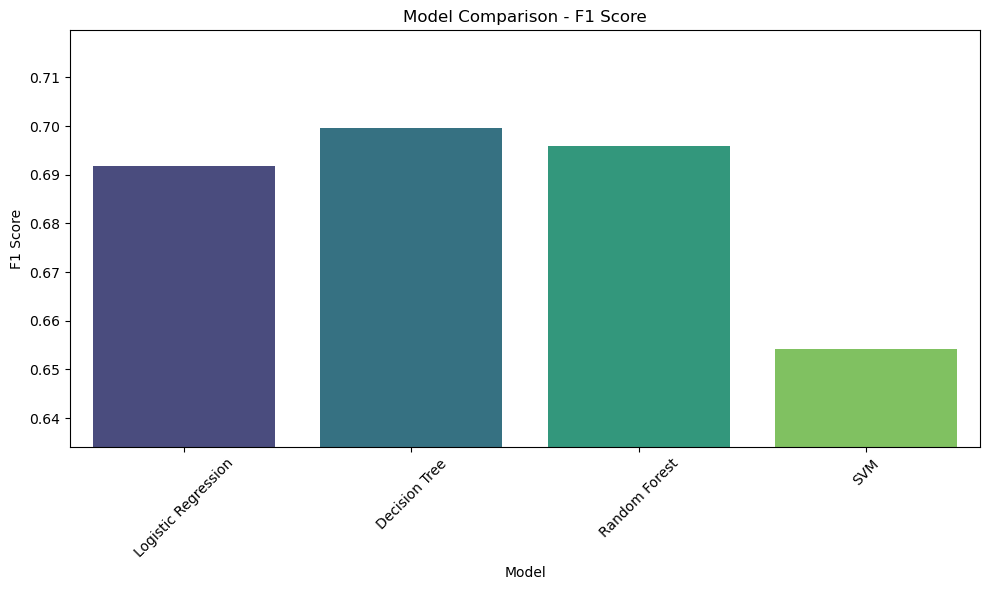

In [14]:
# Plotting F1 Score Comparison (Zoomed Y-axis)
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['F1 Score'], palette='viridis')
plt.title('Model Comparison - F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)

# Adjust the Y-axis to focus on the actual F1 range
min_score = results_df['F1 Score'].min() - 0.02
max_score = results_df['F1 Score'].max() + 0.02
plt.ylim(min_score, max_score)

plt.tight_layout()
plt.show()


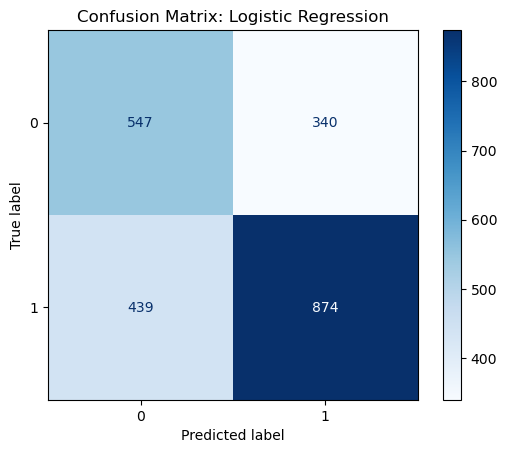

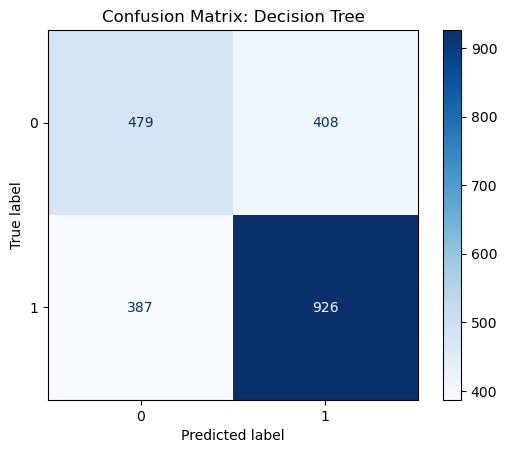

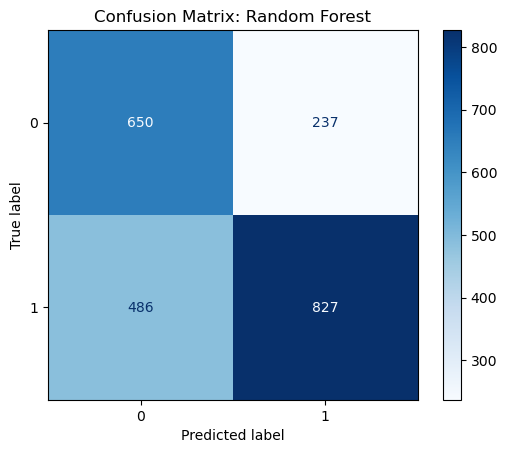

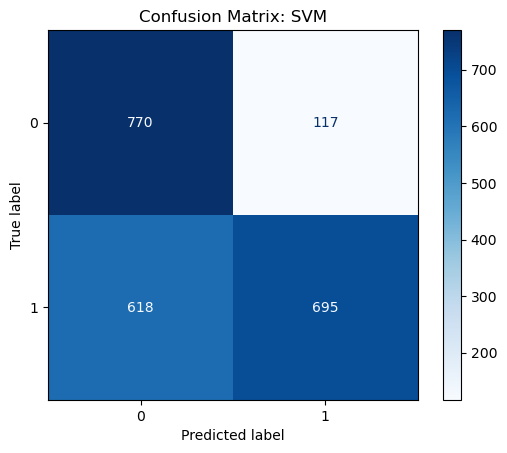

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.grid(False)
    plt.show()


In [16]:
# Get feature importances from the trained Random Forest model
importances = models['Random Forest'].feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better display
rf_feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print("🔍 Top Features by Random Forest:")
print(rf_feature_df.head(10))


🔍 Top Features by Random Forest:
                  Feature  Importance
5           Weight_in_gms    0.258171
4        Discount_offered    0.188550
2     Cost_of_the_Product    0.173526
3         Prior_purchases    0.062040
1         Customer_rating    0.057071
0     Customer_care_calls    0.056641
15          High_Discount    0.056138
14               Gender_M    0.023821
11  Mode_of_Shipment_Ship    0.020107
9       Warehouse_block_F    0.017810


SHAP shape: (300, 16, 2)
X_sample shape: (300, 16)


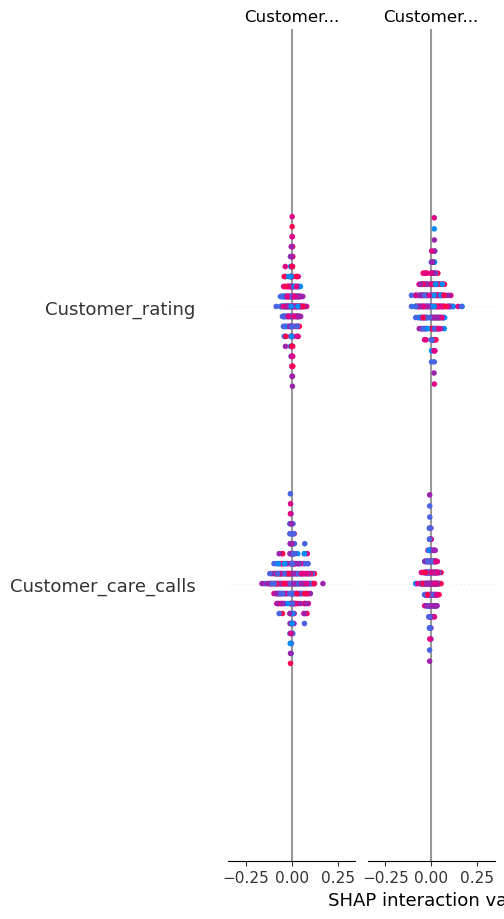

In [17]:
import shap
import numpy as np

# Use a smaller subset for SHAP (to speed up and avoid shape errors)
X_sample = X_train.sample(n=300, random_state=42)

# Create SHAP explainer for Random Forest
explainer = shap.TreeExplainer(models['Random Forest'])

# SHAP values (returns list of 2 arrays for binary classification)
shap_values = explainer.shap_values(X_sample)

# Check if shap_values is a list (binary classification)
if isinstance(shap_values, list):
    # Use SHAP values for class 1 (late delivery)
    shap_values_to_plot = shap_values[1]
else:
    shap_values_to_plot = shap_values

# Sanity check shapes
print("SHAP shape:", shap_values_to_plot.shape)
print("X_sample shape:", X_sample.shape)

# Summary bar plot
shap.summary_plot(shap_values_to_plot, X_sample, plot_type="bar", max_display=10)


In [18]:
# Print top 5 most impactful features
top_features = rf_feature_df.head(5)
print("\n📊 Top 5 Business Impact Features:")
print(top_features)

# Business Insight Statement (you can include in your report)
for i, row in top_features.iterrows():
    print(f"- {row['Feature']} plays a key role in determining delivery delays.")



📊 Top 5 Business Impact Features:
               Feature  Importance
5        Weight_in_gms    0.258171
4     Discount_offered    0.188550
2  Cost_of_the_Product    0.173526
3      Prior_purchases    0.062040
1      Customer_rating    0.057071
- Weight_in_gms plays a key role in determining delivery delays.
- Discount_offered plays a key role in determining delivery delays.
- Cost_of_the_Product plays a key role in determining delivery delays.
- Prior_purchases plays a key role in determining delivery delays.
- Customer_rating plays a key role in determining delivery delays.


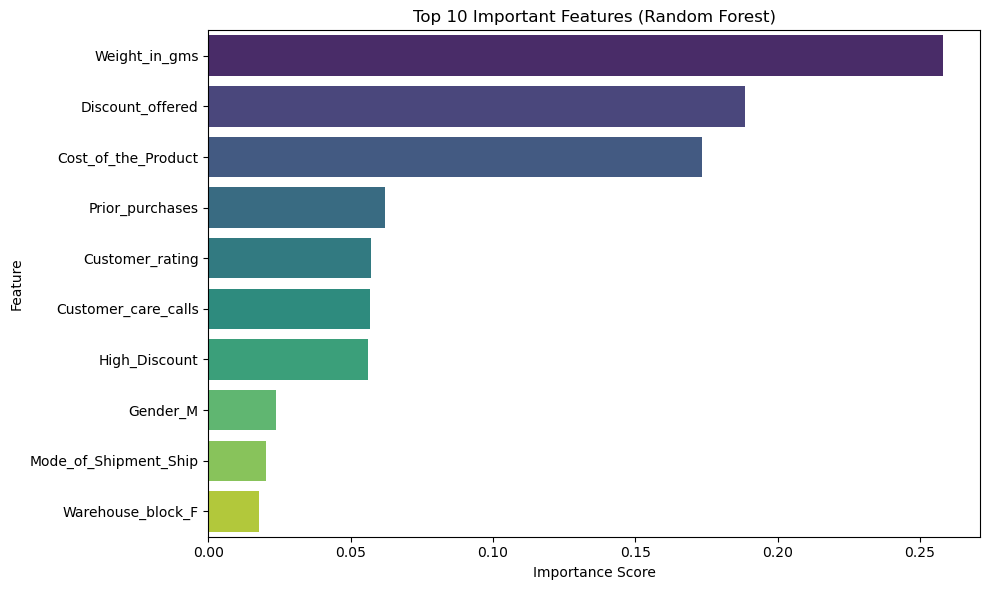

In [19]:
# Plot bar chart for top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_feature_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
